In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import linalg as LA
import cvxpy as cp
from sklearn.metrics import accuracy_score

In [2]:
data = np.genfromtxt('AdaBoost_data.csv',delimiter=',')
print(data)

[[ 1.9  3.1  1. ]
 [ 2.1  2.1  1. ]
 [ 4.5  6.1  1. ]
 [ 4.1  4.5 -1. ]
 [ 3.5  0.9 -1. ]
 [ 5.1  6.9  1. ]
 [ 4.9  3.1 -1. ]
 [ 6.1  5.5  1. ]
 [ 8.2  6.1 -1. ]
 [ 7.9  2.2 -1. ]
 [ 8.5  3.5 -1. ]]


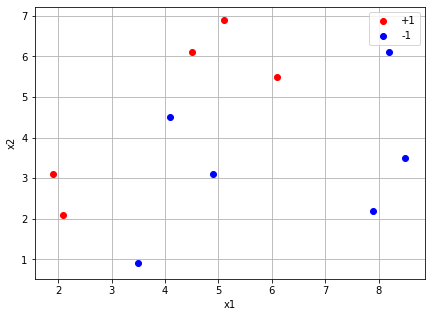

In [3]:
x = data[:,0:2]
y = data[:,2]

label1 = (y==1)
label2 = (y==-1)
plt.scatter(x[label1,0],x[label1,1],color='red')
plt.scatter(x[label2,0],x[label2,1],color='blue')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(('+1','-1'))
plt.grid(True)
fig = plt.gcf()
fig.set_size_inches(7, 5)
plt.show()

In [4]:
K = 3
sarr = [-1,-1,1]
iarr = [0,0,1]
dk = (1.0/len(data))*np.ones(len(data))
darr = [dk]
epsarr = []
alphaarr = []
tarr = []
yhatarr = []
for k in range(K):
    s = sarr[k]
    i = iarr[k]
    tmin = np.floor(min(x[:,i]))
    tmax = np.ceil(max(x[:,i]))
    trange = np.arange(tmin,(tmax+1))
    for (j,t) in zip(range(len(trange)),trange):
        ypred = np.sign((s*(x[:,i]-t)))
        cond = (y!=ypred).astype('float')
        errorn = np.dot(dk,cond)
        if (j==0):
            topt = t
            errorp = errorn
        else:
            if (errorn<errorp):
                topt = t
                errorp = errorn
    yhatk = np.sign((s*(x[:,i]-topt)))
    condk = (y!=yhatk).astype('float')
    epsk = np.dot(dk,condk)
    alphak = 0.5*np.log((1-epsk)/epsk)
    dk = np.multiply(dk,np.exp(-alphak*(np.multiply(y,yhatk))))
    dk = dk/np.sum(dk)
    darr.append(dk)
    epsarr.append(epsk)
    alphaarr.append(alphak)
    tarr.append(topt)
    yhatarr.append(yhatk)
    
ypred = np.sign(sum([alpha*yhat for (alpha,yhat) in zip(alphaarr,yhatarr)]))
train_acc = accuracy_score(y,ypred)*100

In [5]:
d_df = pd.DataFrame(np.array(darr[:-1]).T,columns=['d_0','d_1','d_2'])
d_df.head(50)

,d_0,d_1,d_2
0,0.090909,0.062500,0.038462
1,0.090909,0.062500,0.038462
2,0.090909,0.166667,0.102564
3,0.090909,0.062500,0.166667
4,0.090909,0.062500,0.166667
5,0.090909,0.166667,0.102564
6,0.090909,0.062500,0.166667
7,0.090909,0.166667,0.102564
8,0.090909,0.062500,0.038462
9,0.090909,0.062500,0.038462


In [6]:
print('t^(k) = ' + str(tarr))
print('alpha^(k) = ' + str(alphaarr))
print('Training accuracy = {0:.2f} %'.format(train_acc))

t^(k) = [3.0, 7.0, 5.0]
alpha^(k) = [0.49041462650586315, 0.7331685343967134, 1.01844096363052]
Training accuracy = 100.00 %


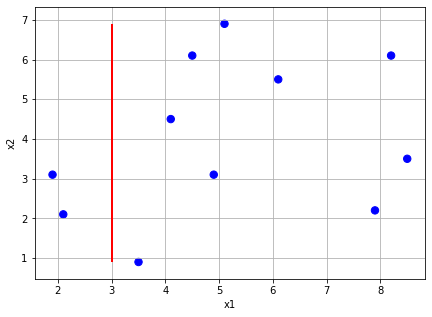

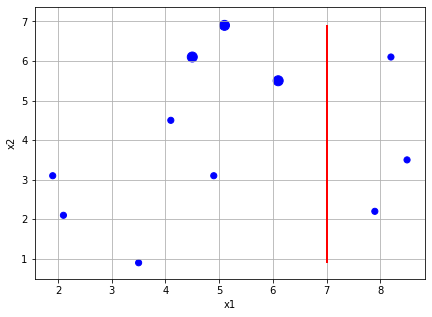

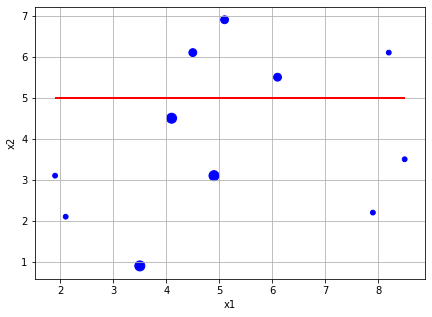

In [7]:
for k in range(K):
    scale = 600*darr[k]
    ik = iarr[k]
    tk = tarr[k]
    alphak = alphaarr[k]
    if (ik==0):
        xdes = tk
        ymin = min(x[:,1])
        ymax = max(x[:,1])
        plt.vlines(x = xdes,ymin = ymin, ymax=ymax, linewidth=2, color='r')
    else :
        ydes = tk
        xmin = min(x[:,0])
        xmax = max(x[:,0])
        plt.hlines(y = ydes, xmin = xmin, xmax=xmax, linewidth=2, color='r')
        
    xdes = t 
    plt.scatter(x[:,0],x[:,1],s = scale, color='blue')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.grid(True)
    fig = plt.gcf()
    fig.set_size_inches(7, 5)
    plt.show()